# Reconhecimento de Caracteres (MNIST) utilizando TensorFlow e Keras

### Referência: [Image Classification in 10 Minutes with MNIST Dataset](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d)

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Convert class vectors to binary class matrices (onehot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [3]:
print('Número de amostras no conjunto de treinamento:', x_train.shape[0])

Número de amostras no conjunto de treinamento: 60000


In [4]:
print('Número de amostras no conjunto de teste:', x_test.shape[0])

Número de amostras no conjunto de teste: 10000


## Image Visualization

Dimensões da imagem: (28, 28)
Rótulo (label): [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


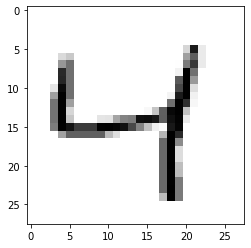

In [5]:
# You may select anything up to 60,000
image_index = 2

example_image = x_train[image_index,]
print('Dimensões da imagem:', example_image.shape)

# The label is 4
print('Rótulo (label):', y_train[image_index])

plt.imshow(example_image, cmap='Greys')
plt.show()

## Reshaping and Normalizing the Images

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
input_shape = (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], *input_shape)
x_test = x_test.reshape(x_test.shape[0], *input_shape)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('Keras array format: (samples, rows, cols, channels)')
print('x_train shape:', x_train.shape)
print('Number of images in x_train:', x_train.shape[0])
print('Number of images in x_test:', x_test.shape[0])

Keras array format: (samples, rows, cols, channels)
x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


## Building the Convolutional Neural Network

In [7]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import backend as K


### Using the Sequential API

In [8]:
# Reset Layer IDs
K.clear_session()

# Creating a Sequential Model and adding the layers
model = Sequential()

# Conv Layer
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# MLP Layer
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(10,activation='softmax'))

# Define loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

### Using the Functional API

In [9]:


# Reset Layer IDs
K.clear_session()

# Input Layer
model_inputs = Input(shape=input_shape)

# Conv Layer
x = Conv2D(filters=28, kernel_size=(3,3), activation='relu')(model_inputs)
x = MaxPooling2D(pool_size=(2,2))(x)

# MLP Layer
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

# Output Layer
predictions = Dense(10, activation='softmax')(x)

# Build model from the input and output objects
model = Model(inputs=model_inputs, outputs=predictions, name='functional')

# Define loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "functional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Training the Model

In [10]:
history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2, shuffle=True)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 31s 643us/sample - loss: 0.2854 - accuracy: 0.9183 - val_loss: 0.1012 - val_accuracy: 0.9717
Epoch 2/10
48000/48000 [==============================] - 14s 282us/sample - loss: 0.0935 - accuracy: 0.9730 - val_loss: 0.0737 - val_accuracy: 0.9782
Epoch 3/10
48000/48000 [==============================] - 14s 293us/sample - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0612 - val_accuracy: 0.9821
Epoch 4/10
48000/48000 [==============================] - 13s 270us/sample - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.0535 - val_accuracy: 0.9843
Epoch 5/10
48000/48000 [==============================] - 13s 276us/sample - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0521 - val_accuracy: 0.9851
Epoch 6/10
48000/48000 [==============================] - 13s 265us/sample - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0504 - val_accuracy: 0.9853
Epoch 7/10
48000/48000 [====================

In [11]:
# Save model
model.save('mnist_model.h5')

# Load model
model = keras.models.load_model('mnist_model.h5')

## Visualizando o treinamento

In [12]:
print(history.history.keys())

acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = history.epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


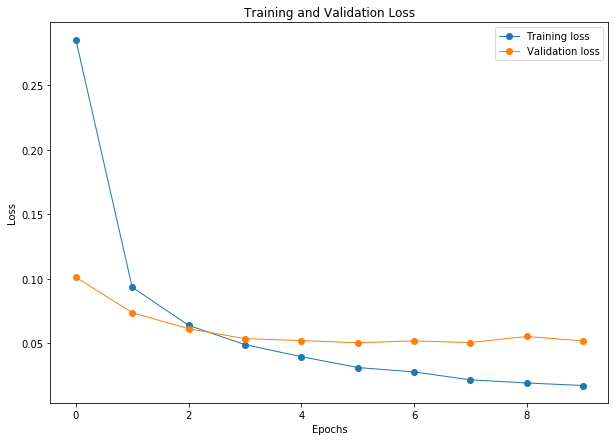

In [13]:
plt.figure(figsize=(10,7))

plt.plot(epochs, loss, '-o')
plt.plot(epochs, val_loss, '-o')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

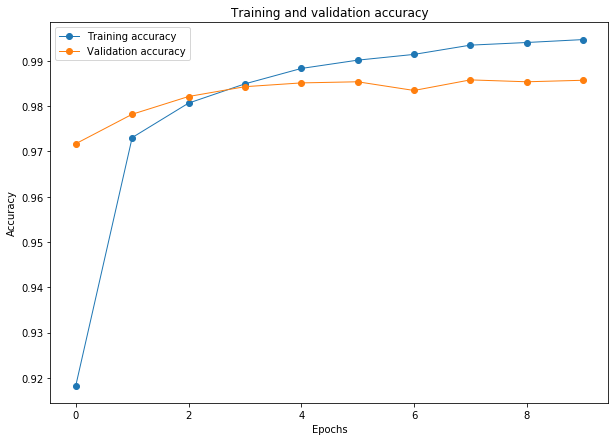

In [14]:
plt.figure(figsize=(10,7))

plt.plot(epochs, acc, '-o')
plt.plot(epochs, val_acc, '-o')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

## Evaluating the Model

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)


print(f'Test Loss: {score[0]:.4f}')
print(f'Test Accuracy: {100*score[1]:.2f}%')


Test Loss: 0.0423
Test Accuracy: 98.67%


## Make individual predictions 

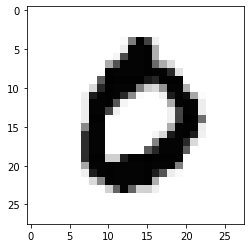

Digito: 0


In [16]:
image_index = 3 # 4444

test_image = np.squeeze(x_test[image_index,], axis=-1)

plt.imshow(test_image,cmap='Greys')
plt.show()

pred = model.predict(test_image.reshape(1,*test_image.shape,1))

print('Digito:', pred.argmax())
